# Tarea 12 - Sebastián Negrete Aragón - Física Computacional
# Semestre 2017-2

## Ejercicio 1

En este ejercicio se busca implementar el método de Euler implícito en el cuál tenemos la relación de recurrencia:
$$x_{k+1}=x_{k}+hf(x_{k+1},t_{k+1})$$
Para cada valor $k$ hay que resolver una ecuación de tipo algebraica en nuestra aproximación en la cual $x_{k}=x(t_{k})$ y $t_{k+1}=t_{k}+h$.
Para resolverla usaré el método de Newton para aproximar el valor de $x_{k+1}$, como se nos ha dicho que no se usará `SymPy` en el código para el método de Newton aproximaremos el valor de la derivada requerida en dicha fórmula con un método numérico. En este caso la derivación simétrica resultó la de mejor desempeño y es la que utilizaré.

Se cumple entonces con el método de Newton que en nuestra fórmula del método de Euler implícito:
$$x_{n+1}=\lim_{k\to \infty}\tilde x_k,$$
donde $\tilde x_{k+1}=x_k-\frac{g(x_k)}{g'(\tilde x_k)}$, con $g(x)=x_n-f(x,t_n)$.

A continuación se da el código partido en tres: una parte que realizará la derivación simétrica, otra que aplique el método de Newton y finalmente el que nos realice el método de Euler implícito.

In [1]:
#Función que realiza la derivación simétrica, recibe:
#f - Función de interés
#x0 - Punto donde se pretende aproximar el valor de la derivada
#h - Valor de incremento/decremento para realizar la aproximación
function derivacion_simetrica(f,x0,h)
    df=(f(x0+h)-f(x0-h))/(2*h) #Derivada simétrica
    return df #Regresa el valor de la derivada simétrica
end

derivacion_simetrica (generic function with 1 method)

In [2]:
#Función con la que aplicaremos el método de Newton usando la derivada simétrica, recibe:
#g - Función de interés, dada por el método de Euler implícito
#x0 - Condición inicial
#h - Valor de incremento/decremento para la derivación simétrica
function metodo_newton(g,x0,h)
    dg(z)=derivacion_simetrica(g,z,h) #Definimos a dg(z) como la derivación simétrica, no usamos la variable x porque x será un valor bien definido
    x=x0 # Condición inicial
#Dado que la derivación simétrica tiene una excelente aproximación al valor real de la derivada en el punto deseado y también el método de Newton resulta ser eficiente en la aproximación se predetermina que la iteración se realice 20 veces para fines prácticos.
    for i in 1:20 #Ciclo for para 20 iteraciones
        x=x-g(x)/dg(x) #Método de Newton con una mejor aproximación al valor de la raíz
    end #Fin de la iteración
    return x #Regresa una buena aproximación al valor de la raíz de g
end

metodo_newton (generic function with 1 method)

In [3]:
#Finalmente damos la función que aplica el método de Euler implícito, recibe:
#f - función de la relación de recurrencia
#x0 - Condición inicial
#listat - Lista la cual aglomera la condición de tiempo inicial (primer valor) y el paso h que pide el método (incremento la cantidad de veces necesarias)
#El código guarda similitud respecto al método de Euler de la tarea 11
function metodo_euler_implicito(f,x0,listat)
    longitud=length(listat) #Variable para obtener el número de elementos de la lista, sirve para controlar la iteración
    listax=zeros(longitud) #Declaramos la lista 'listax'
    listax[1]=x0  #En listax el primer valor es la condición inicial x0
    h=abs(listat[2]-listat[1]) #Para obtener el incremento h en nuestra lista h sacamos la diferencia entre los primeros dos elementos (se crea un linspace o análogos con particiones homogéneas, por eso es útil esto)
    for i in 1:longitud-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        xk=listax[i] #Definimos a xk como el k-ésimo elemento de listax
        t=listat[i+1] #De la misma manera, proponemos a t como el (k+1)-ésimo elemento de listat
        g(z)=z-xk-h*f(z,t) #g es la función con raíz x_(k+1) a la que le aplicaremos el Método de Newton
        listax[i+1]=metodo_newton(g,xk,h) #Aplicando el Método de Newton usando g, xk y h, el resultado se anexa a la listax como el (k+1)-ésimo término
    end #Fin del Ciclo for
    return listax #El resultado es la listax con todos los valores salvados de x_k
end

metodo_euler_implicito (generic function with 1 method)

## Ejercicio 2

Una forma de volver de nuevo el método de Euler implícito a uno explícito sería aproximar el punto desconocido de alguna forma, una manera sencilla es usando _Euler_ de nuevo, sin embargo podemos hacer una modificación más, dado que aproximaremos el siguiente punto, nuestra aproximación será mejor si no tomamos un punto tan lejano como lo es $n+1$, sino el punto medio, $n+1/2$:

$$x_{n+1}=x_n+hf(\tilde x_{n+1/2},t_{n+1/2}).$$
Claramente si desconocemos $\tilde x_{n+1/2}$, esto todavia es el método de Euler implícito a medio paso, es decir:
$$\tilde x_{n+1/2}\approx x_n+\frac{h}{2}f\left(x_n,t_n\right).$$
Sustituyendo nos queda que:
$$x_{n+1}=x_n+hf\left(x_n+\frac{h}{2}f(x_n,t_n),t_{n+1/2}\right).$$
Este es el método _del punto medio_ o _método de Euler modificado_ con $\displaystyle t_{k+\frac{1}{2}}=t_{k}+\frac{h}{2}$. Mientras que $\displaystyle\tilde{x}_{k+\frac{1}{2}}=x_{k}+\frac{h}{2}f(x_{k},t_{k})$. El error global del método es proporcional a $\Delta t h^2$. 
Implementando dicho método se tiene el siguiente código:

In [4]:
#Función que implementa el método de Euler modificado o del punto medio
#f - función de la ecuación
#x0 - Condición inicial
#listat - Lista la cual aglomera la condición de tiempo inicial (primer valor) y el paso h que pide el método (incremento la cantidad de veces necesarias)
function puntomedio(f,x0,listat) 
    longitud=length(listat) #Variable para obtener el número de elementos de la lista, sirve para controlar la iteración
    listax=zeros(longitud) #Declaramos la lista 'listax'
    listax[1]=x0 #En listax el primer valor es la condición inicial x0
    l=abs((listat[2]-listat[1])/2) #Análogo al incremento del método de Euler explícito o implícito 'h' sólo que aquí se divide entre dos y le denominamos 'l'
    for i in 1:longitud-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        x=listax[i]+l*f(listax[i],listat[i]) #Paso del método para conocer x~_(n+1/2), se iguala a una variable x
        listax[i+1]=listax[i]+2l*f(x,listat[i]+l) #Sustitución en x_(n+1), hemos aplicado el método de punto medio y guardamos el valor en la listax declarada
    end #Fin de ciclo
    return listax #Regresa la lista de valores x calculados
end

puntomedio (generic function with 1 method)

## Ejercicio 3

El método de Runge-Kutta de orden 4 es el más común de la familia de métodos Runge-Kutta, para obtenerlo utilizamos la regla de Simpson para la integral, sin embargo en esta ocasión se hicieron otras combinaciones de métodos para calcular los coeficientes $k$, de tal forma que el error en cada paso al comparar con el método de Taylor es de orden $h^5$, por lo tanto el error global es del orden $h^4$. El método se escribe como sigue:
$$ x_{n+1}=x_n+\frac{h}{6}\left( k_1+2 k_2+2 k_3 +k_4 \right),$$
donde:
\begin{align*}
k_1&=f(t_n,x_n),\\
k_2&=f(t_{n+1/2},x_n+\frac{h}{2}k_1),\\
k_3&=f(t_{n+1/2},x_n+\frac{h}{2}k_2),\\
k_4&=f(t_n,x_n+h k_3).\\
\end{align*}
Implementado en código:

In [5]:
#Función que implementa el método de Runge-Kutta de orden 4, recibe:
#f - función de la ecuación
#x0 - Condición inicial
#listat - Lista la cual aglomera la condición de tiempo inicial (primer valor) y el paso h que pide el método (incremento la cantidad de veces necesarias)
function RungeKutta4(f,x0,listat)
#La explicación de todo lo declarado a partir de este enunciado hasta antes del ciclo for es análogo a lo descrito en la función 'puntomedio', considero reiterativo ponerlo de nuevo tan detallado.
    longitud=length(listat) #Defino la cantidad de elementos de la listat
    listax=zeros(longitud) #Declaro la listax
    listax[1]=x0 #Asigno el primer valor de la listax como mi condición inicial x0
    l=(listat[2]-listat[1])/2 #Defino el paso l='h/2'
    for i in 1:longitud-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        #Aplicación del método iterativo
        k1=f(listax[i],listat[i]) #Hallamos k1 con los términos i-ésimos de las dos listas
        k2=f(listax[i]+l*k1,listat[i]+l) #Después determinamos k2
        k3=f(listax[i]+l*k2,listat[i]+l) #Posteriormente k3
        k4=f(listax[i]+2l*k3,listat[i]+2l) #Finalmente k4
        listax[i+1]=listax[i]+(l/3)*(k1+2k2+2k3+k4) #Aplicamos el método de Runge-Kutta de orden 4 el cuál nos da el (i+1)-ésimo valor para x, lo guardamos en dicha posición en la listax
    end #Fin de ciclo
    return listax #Devuelve la listax con los valores hallados de x_k
end

RungeKutta4 (generic function with 1 method)

## Ejercicio 4

De la tarea 11 al implementar el método de Euler pudimos probar con la siguiente ecuación diferencial:
$$\frac{dx}{dt}=-\alpha x, x(0)=1\text{ y }2, \text{ y } t\in(0,8).$$
con $\alpha>0$, para $\alpha=2.5$, $h=1.0,0.5,0.2,0.01$.

__Por lo que sabemos de Ecuaciones Diferenciales la solución a dicha ecuación diferencial es:
$$x(t)=x_{0}e^{-2.5t}$$__

Ahora resolveremos con el método implícito. Incluyo el código del método de Euler del notebook de la Tarea 11 para poder hacer comparaciones.

In [6]:
#La siguiente función implementa el método de Euler para resolver la ecuación diferencial de primer orden dx/dt=f(x,t) usando la segunda forma (la más inteligente)
#Recibe como argumentos
#f: la función de la ecuación
#x0: Condición inicial
#listt lista la cual aglomera la condición de tiempo inicial (primer valor) y el paso h que pide el método (incremento la cantidad de veces necesarias)
function metodo_euler(f,x0,listt)
    longitud=length(listt) #Variable para obtener el número de elementos de la lista, sirve para controlar la iteración
    listx=zeros(longitud)  #Lista para guardar las x_k de la iteración
    listx[1]=x0 #En listx el primer valor es la condición inicial x0
    h=abs(listt[2]-listt[1]) #Para obtener el incremento h en nuestra lista h sacamos la diferencia entre los primeros dos elementos (se crea un linspace o análogos con particiones homogéneas, por eso es útil esto)
    for i in 1:longitud-1 #Ciclo for, se hace tantas veces como la longitud de la lista menos un valor
        listx[i+1]=listx[i]+(h*f(listx[i],listt[i])) # Método de Euler aplicado
    end #Fin de ciclo
    return listx #Regresamos listx
end

metodo_euler (generic function with 1 method)

__*A continuación para el caso con condición a la frontera $x(0)=1$*__

In [7]:
#Definimos nuestra función f(x,t)
f(x,t)=-2.5x

f (generic function with 1 method)

In [8]:
#Definimos la listt usando listat1, tomando el intervalo (0,8) y h=1
listat1=0:1:8

0:1:8

In [9]:
#Aplicando el método de Euler implícito para x0=1
eulerimplicito11=metodo_euler_implicito(f,1,listat1)

9-element Array{Float64,1}:
 1.0        
 0.285714   
 0.0816327  
 0.0233236  
 0.00666389 
 0.00190397 
 0.000543991
 0.000155426
 4.44074e-5 

In [10]:
#Para graficar usaremos PyPlot
using PyPlot

In [11]:
#Para graficar la solución exacta
t=linspace(0,8,100)

0.0:0.08080808080808081:8.0

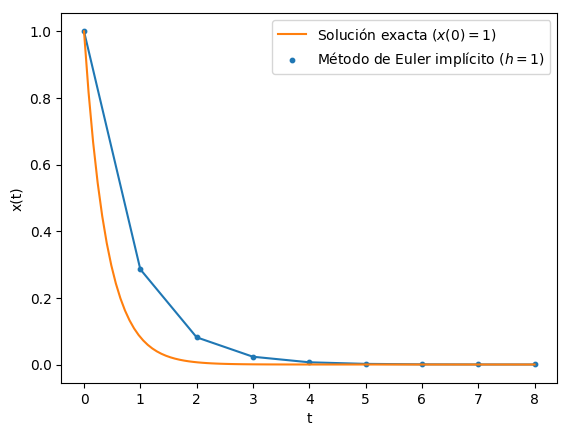

In [12]:
scatter(listat1,eulerimplicito11,label=L"Método de Euler implícito ($h=1$)",s=10)
plot(listat1,eulerimplicito11)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

In [13]:
#Para el caso con h=0.5
listat2=0:0.5:8
eulerimplicito12=metodo_euler_implicito(f,1,listat2)

17-element Array{Float64,1}:
 1.0        
 0.444444   
 0.197531   
 0.0877915  
 0.0390184  
 0.0173415  
 0.00770735 
 0.00342549 
 0.00152244 
 0.000676639
 0.000300729
 0.000133657
 5.94032e-5 
 2.64014e-5 
 1.1734e-5  
 5.2151e-6  
 2.31782e-6 

In [14]:
#Para el caso con h=0.2
listat3=0:0.2:8
eulerimplicito13=metodo_euler_implicito(f,1,listat3)

41-element Array{Float64,1}:
 1.0       
 0.666667  
 0.444444  
 0.296296  
 0.197531  
 0.131687  
 0.0877915 
 0.0585277 
 0.0390184 
 0.0260123 
 0.0173415 
 0.011561  
 0.00770735
 ⋮         
 7.82264e-6
 5.2151e-6 
 3.47673e-6
 2.31782e-6
 1.54521e-6
 1.03014e-6
 6.86761e-7
 4.57841e-7
 3.05227e-7
 2.03485e-7
 1.35657e-7
 9.04377e-8

In [15]:
#Para el caso h=0.01
listat4=0:0.01:8
eulerimplicito14=metodo_euler_implicito(f,1,listat4)

801-element Array{Float64,1}:
 1.0       
 0.97561   
 0.951814  
 0.928599  
 0.905951  
 0.883854  
 0.862297  
 0.841265  
 0.820747  
 0.800728  
 0.781198  
 0.762145  
 0.743556  
 ⋮         
 3.45836e-9
 3.37401e-9
 3.29172e-9
 3.21143e-9
 3.1331e-9 
 3.05669e-9
 2.98213e-9
 2.9094e-9 
 2.83844e-9
 2.76921e-9
 2.70167e-9
 2.63577e-9

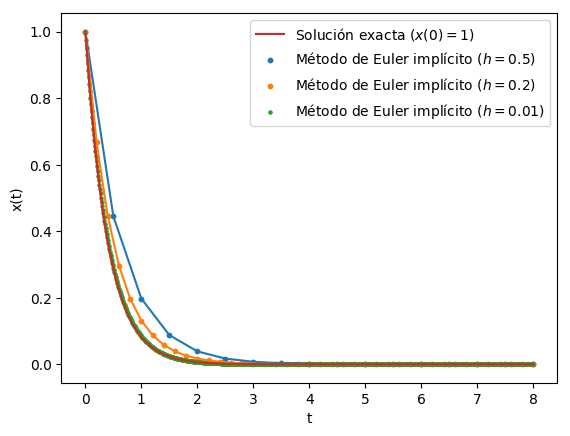

In [16]:
#Graficando estas iteraciones
scatter(listat2,eulerimplicito12,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(listat2,eulerimplicito12)
scatter(listat3,eulerimplicito13,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(listat3,eulerimplicito13)
scatter(listat4,eulerimplicito14,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(listat4,eulerimplicito14)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

Del método de Euler se obtuvieron las siguientes gráficas:

In [17]:
#Aplicando Euler para los pasos h propuestos, x0=1
euler11=metodo_euler(f,1,listat1)
euler12=metodo_euler(f,1,listat2)
euler13=metodo_euler(f,1,listat3)
euler14=metodo_euler(f,1,listat4)

801-element Array{Float64,1}:
 1.0       
 0.975     
 0.950625  
 0.926859  
 0.903688  
 0.881096  
 0.859068  
 0.837592  
 0.816652  
 0.796236  
 0.77633   
 0.756921  
 0.737998  
 ⋮         
 2.11175e-9
 2.05895e-9
 2.00748e-9
 1.95729e-9
 1.90836e-9
 1.86065e-9
 1.81413e-9
 1.76878e-9
 1.72456e-9
 1.68145e-9
 1.63941e-9
 1.59843e-9

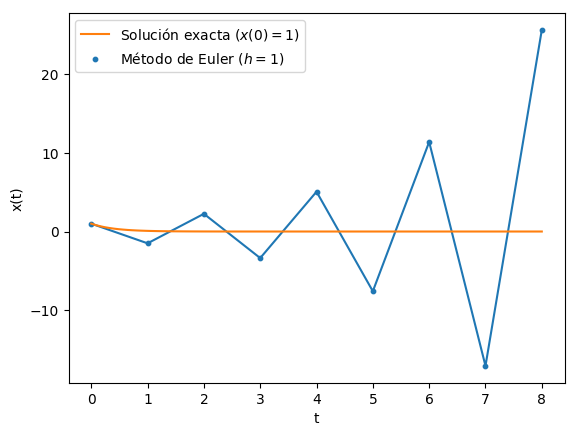

In [18]:
#Graficando para h=1
scatter(listat1,euler11,label=L"Método de Euler ($h=1$)",s=10)
plot(listat1,euler11)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

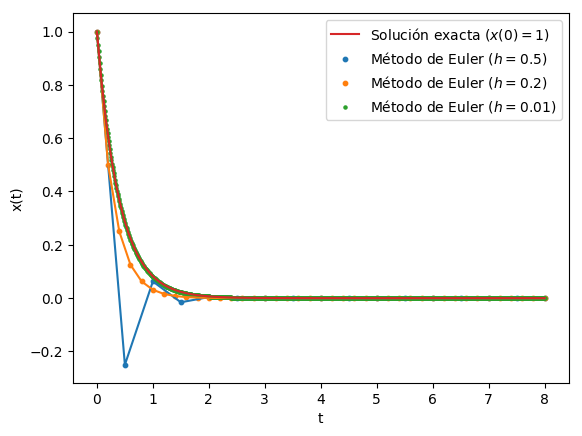

In [19]:
#Graficando para los demás valores de h
scatter(listat2,euler12,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listat2,euler12)
scatter(listat3,euler13,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat3,euler13)
scatter(listat4,euler14,label=L"Método de Euler ($h=0.01$)",s=5)
plot(listat4,euler14)
plot(t,exp.(-2.5*t),label=L"Solución exacta ($x(0)=1$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

__*A continuación para el caso con condición a la frontera $x(0)=2$*__

In [20]:
#Aplicamos Euler implícito y Euler para graficar
#Euler implícito para los 4 pasos de h
eulerimplicito21=metodo_euler_implicito(f,2,listat1)
eulerimplicito22=metodo_euler_implicito(f,2,listat2)
eulerimplicito23=metodo_euler_implicito(f,2,listat3)
eulerimplicito24=metodo_euler_implicito(f,2,listat4)
#Euler para los 4 pasos de h
euler21=metodo_euler(f,2,listat1)
euler22=metodo_euler(f,2,listat2)
euler23=metodo_euler(f,2,listat3)
euler24=metodo_euler(f,2,listat4)

801-element Array{Float64,1}:
 2.0       
 1.95      
 1.90125   
 1.85372   
 1.80738   
 1.76219   
 1.71814   
 1.67518   
 1.6333    
 1.59247   
 1.55266   
 1.51384   
 1.476     
 ⋮         
 4.22349e-9
 4.11791e-9
 4.01496e-9
 3.91458e-9
 3.81672e-9
 3.7213e-9 
 3.62827e-9
 3.53756e-9
 3.44912e-9
 3.3629e-9 
 3.27882e-9
 3.19685e-9

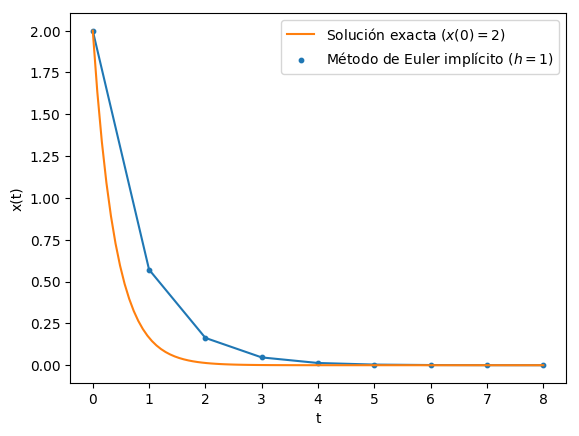

In [21]:
#Para h=1 implicito
scatter(listat1,eulerimplicito21,label=L"Método de Euler implícito ($h=1$)",s=10)
plot(listat1,eulerimplicito21)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

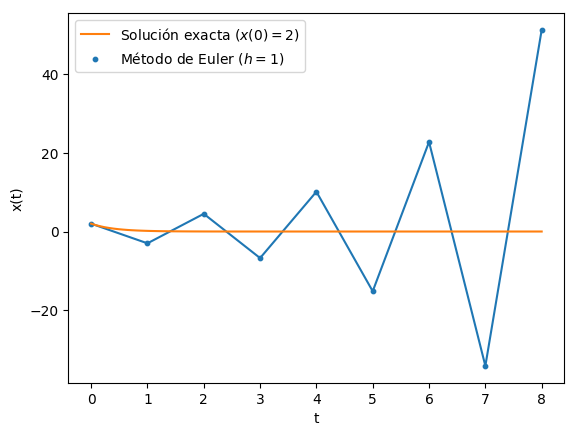

In [22]:
#Para h=1 Euler estándar
scatter(listat1,euler21,label=L"Método de Euler ($h=1$)",s=10)
plot(listat1,euler21)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

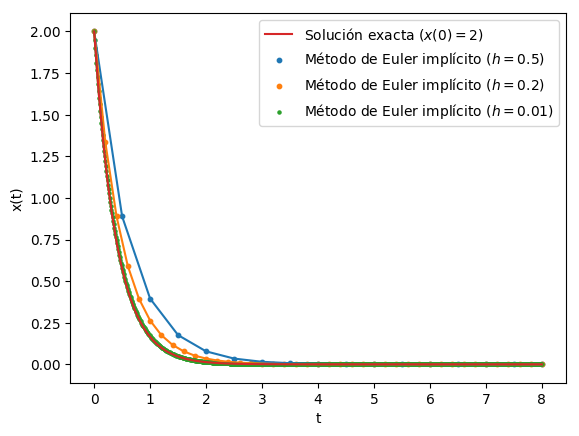

In [23]:
#Para las demás h, impícito
scatter(listat2,eulerimplicito22,label=L"Método de Euler implícito ($h=0.5$)",s=10)
plot(listat2,eulerimplicito22)
scatter(listat3,eulerimplicito23,label=L"Método de Euler implícito ($h=0.2$)",s=10)
plot(listat3,eulerimplicito23)
scatter(listat4,eulerimplicito24,label=L"Método de Euler implícito ($h=0.01$)",s=5)
plot(listat4,eulerimplicito24)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

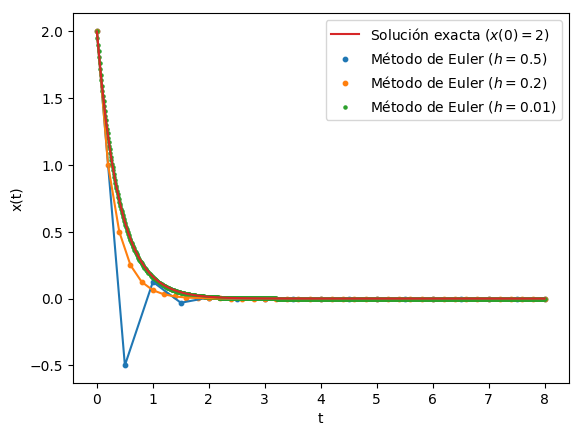

In [24]:
#Para las demás h, estándar
scatter(listat2,euler22,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listat2,euler22)
scatter(listat3,euler23,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat3,euler23)
scatter(listat4,euler24,label=L"Método de Euler ($h=0.01$)",s=5)
plot(listat4,euler24)
plot(t,2exp.(-2.5*t),label=L"Solución exacta ($x(0)=2$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

__Discusión__

1.- Notamos que para ambas condiciones a la frontera las gráficas son similares, me basta hablar entonces de los pasos $h$.

2.- Para $h=1$ el método de Euler ni siquiera converge a la solución exacta, mientras que el método implícito si.

3.- Para $h=0.5$ el método de Euler comienza a converger a la solución pero los puntos no son próximos y aún se presentan puntos con comportamientos divergentes para $t<2$, en cambio por el método implícito tenemos una forma muy parecida a la solución

4.- En el método de Euler las aproximaciones convergen por abajo de la solución, mientras que en el método implícito por arriba de la solución. Esto tiene fundamento en que al momento de realizar las integraciones con mismas particiones pero distintos puntos en cada subintervalo inducido tendremos distintas aproximaciones.

5.- Cuando $h\rightarrow0$ las dos aproximaciones resultan indistinguibles y de  buena calidad.

## Ejercicio 5

También de la Tarea 11 tuvimos que aplicar el método de Euler para resolver la ecuación:
$$\frac{dx}{dt}=\frac{2x-18 t}{1+t}.$$
Comparando la respuesta con la solución exacta: $4+8t-5t^2$

Ahora lo haremos con el método de punto medio y el método de Runge-Kutta de orden 4 con $t\in[0,3]$

__Notemos que de la solución exacta x(0)=4__

In [25]:
#Definimos la función propuesta
f(x,t)=(2x-18t)/(1+t)

f (generic function with 1 method)

In [26]:
#Damos las listas para aplicar método del punto medio con h=0.1, 0.2 y 0.5 en el intervalo (0,3)
listat5=0:0.5:3
listat6=0:0.2:3
listat7=0:0.1:3

0.0:0.1:3.0

In [27]:
#Aplicamos el método con las listas generadas, la condición inicial y la función f(x,t)
puntomedio1=puntomedio(f,4,listat5)
puntomedio2=puntomedio(f,4,listat6)
puntomedio3=puntomedio(f,4,listat7)

31-element Array{Float64,1}:
   4.0      
   4.75238  
   5.40501  
   5.95787  
   6.41098  
   6.76433  
   7.01791  
   7.17174  
   7.2258   
   7.18009  
   7.03462  
   6.78939  
   6.44439  
   ⋮        
   1.23597  
   0.0928443
  -1.15004  
  -2.4927   
  -3.93512  
  -5.47731  
  -7.11926  
  -8.86098  
 -10.7025   
 -12.6437   
 -14.6847   
 -16.8255   

In [28]:
#Para graficar la solución exacta damos:
tsol=linspace(0,3,100)

0.0:0.030303030303030304:3.0

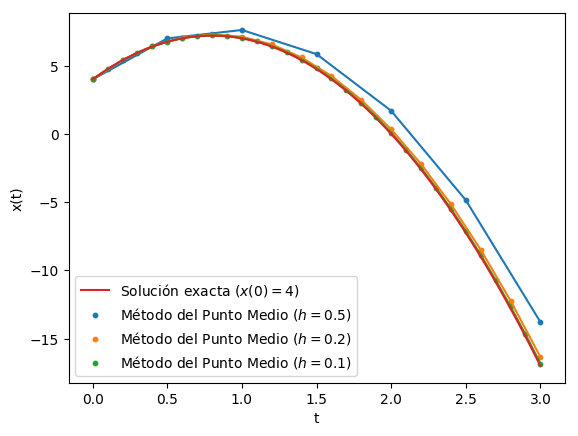

In [29]:
#Graficando
scatter(listat5,puntomedio1,label=L"Método del Punto Medio ($h=0.5$)",s=10)
plot(listat5,puntomedio1)
scatter(listat6,puntomedio2,label=L"Método del Punto Medio ($h=0.2$)",s=10)
plot(listat6,puntomedio2)
scatter(listat7,puntomedio3,label=L"Método del Punto Medio ($h=0.1$)",s=10)
plot(listat7,puntomedio3)
plot(tsol,-5tsol.^2+8tsol+4,label=L"Solución exacta ($x(0)=4$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

Comparando con el método de Euler:

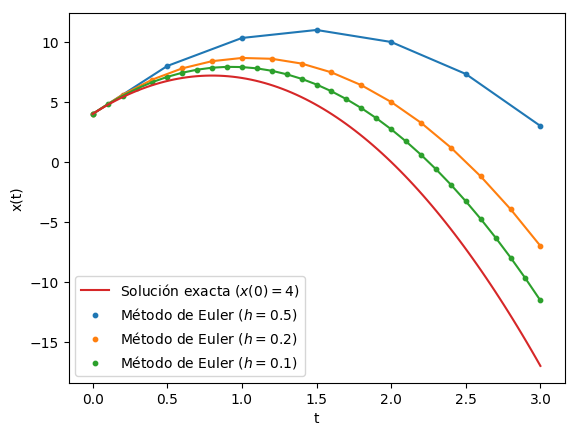

In [30]:
euler_5=metodo_euler(f,4,listat5)
euler_6=metodo_euler(f,4,listat6)
euler_7=metodo_euler(f,4,listat7)
scatter(listat5,euler_5,label=L"Método de Euler ($h=0.5$)",s=10)
plot(listat5,euler_5)
scatter(listat6,euler_6,label=L"Método de Euler ($h=0.2$)",s=10)
plot(listat6,euler_6)
scatter(listat7,euler_7,label=L"Método de Euler ($h=0.1$)",s=10)
plot(listat7,euler_7)
plot(tsol,-5tsol.^2+8tsol+4,label=L"Solución exacta ($x(0)=4$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

Notamos que desde $h=0.5$ el método de punto medio tiene una aproximación más exacta y precisa (mejor ajuste) a la solución exacta.

Ahora aplicando el Método de Runge-Kutta de orden 4:

In [31]:
#Aplicamos el método con las listas generadas para el método de punto medio, la condición inicial y la función f(x,t)
RungeKutta4_1=RungeKutta4(f,4,listat5)
RungeKutta4_2=RungeKutta4(f,4,listat6)
RungeKutta4_3=RungeKutta4(f,4,listat7)

31-element Array{Float64,1}:
   4.0        
   4.75001    
   5.40002    
   5.95003    
   6.40004    
   6.75005    
   7.00006    
   7.15007    
   7.20008    
   7.15009    
   7.0001     
   6.75011    
   6.40013    
   ⋮          
   1.15023    
   0.000244845
  -1.24974    
  -2.59972    
  -4.0497     
  -5.59968    
  -7.24966    
  -8.99964    
 -10.8496     
 -12.7996     
 -14.8496     
 -16.9996     

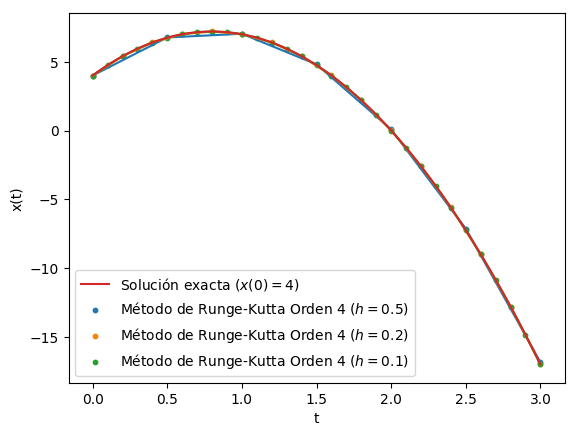

In [32]:
#Graficando
scatter(listat5,RungeKutta4_1,label=L"Método de Runge-Kutta Orden 4 ($h=0.5$)",s=10)
plot(listat5,RungeKutta4_1)
scatter(listat6,RungeKutta4_2,label=L"Método de Runge-Kutta Orden 4 ($h=0.2$)",s=10)
plot(listat6,RungeKutta4_2)
scatter(listat7,RungeKutta4_3,label=L"Método de Runge-Kutta Orden 4 ($h=0.1$)",s=10)
plot(listat7,RungeKutta4_3)
plot(tsol,-5tsol.^2+8tsol+4,label=L"Solución exacta ($x(0)=4$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

Apreciamos que con el método de Runge-Kutta de orden 4 se ha logrado el mejor ajuste con $h$ de mayor valor, lo que implica que necesitamos una menor cantidad de puntos que con el método de punto medio y Euler para lograr una buena aproximación. Esto es conveniente para programar. Para $h=0.5$ se tiene un ajuste tan bueno como $h=0.2$ con punto medio, y ni se diga si comparamos con el método de Euler. De hecho graficando solo $h=0.1$ para Runge-Kutta de orden 4 con la solución exacta notaremos que la aproximación no se distingue de la solución (con excepción claro de que es un conjunto de puntos discreto contra una curva en el plano real).

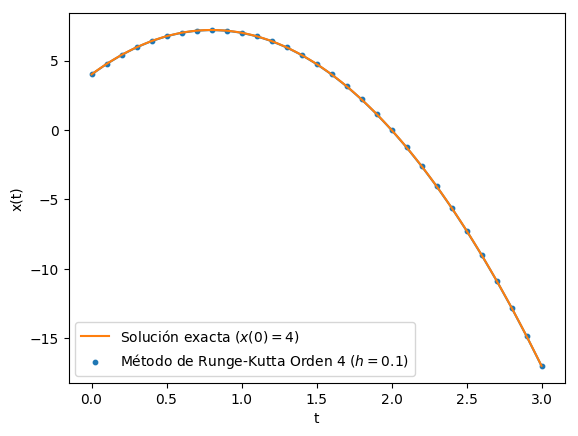

In [33]:
scatter(listat7,RungeKutta4_3,label=L"Método de Runge-Kutta Orden 4 ($h=0.1$)",s=10)
plot(listat7,RungeKutta4_3)
plot(tsol,-5tsol.^2+8tsol+4,label=L"Solución exacta ($x(0)=4$)")
xlabel("t")
ylabel("x(t)")
legend()
show()

## Ejercicio 6

Se pide hallar la energía total de un oscilador armónico, la ecuación diferencial requerida para esto es:

$$\ddot{x}=-kx,\:k>0$$

En este caso trabajaré con los siguientes parámetros:
$$m=1\:\mathrm{kg}$$
$$k=6\:\mathrm{N/m}$$
$$x(0)=2\:\mathrm{m}$$
$$\dot{x}(0)=4\:\mathrm{m/s}$$
$$t\in(0,10)$$

Por el curso de Ecuaciones Diferenciales I las soluciones exactas para $x(t)$ y $\dot{x}(t)$ son:
$$x(t)=2cos(\sqrt{6}t)+\displaystyle\frac{4}{\sqrt{6}}sin(\sqrt{6}t)$$
$$\dot{x}(t)=-2\sqrt{6}sin(\sqrt{6}t)+4cos(\sqrt{6}t)$$

Ahora, si tomamos $u(t)=\dot{x}(t)$, entonces:

$$\left\{\begin{array}{ll}
\dot{x}=u, & x_{0}=x(0)\\
\dot{u}=-kx, & u_{0}=\dot{x}(0)
\end{array}\right.$$

Es decir $\mathbf{x}(t)=(x(t),u(t))$ y $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$, entonces:

$$\frac{d\mathbf{x}}{dt}=\boldsymbol{f}(\mathbf{x},t),$$

con la condición inicial $\mathbf{x}_{0}=\mathbf{x}(0)$.

En nuestro caso $\:\boldsymbol{f}(\mathbf{x},t)=(u(t),-kx(t))$ por lo que si damos un arreglo $\mathbf{x}$ en el cual en x[1] guardemos los valores de $x$ y en x[2] los valores de $\dot{x}$ como `(x[2],-kx[1])`, es decir $\mathbf{x}(t)=$ `(x[1],x[2])`

Para implementar primero las aproximaciones respectivas a $x(t)$ y a $\dot{x}$ para encontrar luego la energía haré unas modificaciones al código del método de Euler explícito y Krone-Kutta de orden 4.

In [34]:
#Donde comente es donde radican las variaciones que permitiran realizar de una manera más simple el manejo de varias condiciones iniciales
function metodo_euler_variante(f,listat,x0)
    longitud=length(listat)
    x=x0
    h=listat[2]-listat[1]
    listax=[] #Solo declaro a listax como un arreglo vacío
    push!(listax,x) #Aplico push! para agregar un valor a la listax el valor x0 que es la condición inicial
    for i in 2:longitud #El Ciclo for ahora corre de i=2 hasta que haya usado todos los valores de la listat
        t=listat[i] #Para usar el elemento t correspondiente a la iteración
        x=x+f(x,t)*h #Aplicando el método de Euler
        push!(listax,x) #Agrego el valor encontrado a la listax el valor de x que encontré
    end
    return listax #Regresó el arreglo
end

metodo_euler_variante (generic function with 1 method)

In [35]:
#Donde comente es donde radican las variaciones que permitiran realizar de una manera más simple el manejo de varias condiciones iniciales
function RungeKutta4_variante(f,listat,x0)
    longitud=length(listat)
    x=x0
    l=(listat[2]-listat[1])/2
    listax=[] #Solo declaro a listax como un arreglo vacío
    push!(listax,x) #Aplico push! para agregar un valor a la listax el valor x0 que es la condición inicial
    for i in 2:length(listat) #El Ciclo for ahora corre de i=2 hasta que haya usado todos los valores de la listat
        t=listat[i] #Para usar el elemento t correspondiente a la iteración
        k1=f(x,t) #Encontramos k1 ahora usando x,t en vez de explicitamente indicar los elementos de una lista
        k2=f(x+l*k1,t+l)
        k3=f(x+l*k2,t+l)
        k4=f(x+2l*k3,t+2l)
        x=x+(l/3)*(k1+2k2+2k3+k4) #Aplicamos el método de Runge-Kutta
        push!(listax,x) #Salvo el valor de x en listax
    end
    return listax #Regreso el arreglo
end

RungeKutta4_variante (generic function with 1 method)

In [36]:
f(x,t)=[x[2],-6*x[1]]

f (generic function with 1 method)

In [37]:
listatE=0:0.1:10;             #Elijo h=0.1
arregloE=metodo_euler_variante(f,listatE,[2,4]) #Ahora podré evaluar las condiciones x(0)=2, x'(0)=4 en el método y recibir un arreglo con entradas de tipo [x_n,x'_n]

101-element Array{Any,1}:
 [2, 4]              
 [2.4, 2.8]          
 [2.68, 1.36]        
 [2.816, -0.248]     
 [2.7912, -1.9376]   
 [2.59744, -3.61232] 
 [2.23621, -5.17078] 
 [1.71913, -6.51251] 
 [1.06788, -7.54399] 
 [0.31348, -8.18471] 
 [-0.504991, -8.3728]
 [-1.34227, -8.06981]
 [-2.14925, -7.26444]
 ⋮                   
 [-9.3548, -81.3912] 
 [-17.4939, -75.7783]
 [-25.0718, -65.282] 
 [-31.6, -50.2389]   
 [-36.6238, -31.279] 
 [-39.7517, -9.30465]
 [-40.6822, 14.5464] 
 [-39.2276, 38.9557] 
 [-35.332, 62.4923]  
 [-29.0828, 83.6915] 
 [-20.7136, 101.141] 
 [-10.5995, 113.569] 

Las soluciones en código para $x(t)$ y $\dot{x}(t)$ son:

In [38]:
solucionx(t)=2*cos(sqrt(6)*t)+(4/sqrt(6))*sin(sqrt(6)*t)
solucionv(t)=-2*sqrt(6)*sin(sqrt(6)*t)+4*cos(sqrt(6)*t)

solucionv (generic function with 1 method)

In [39]:
#Con la función `map` vamos a poder definir dos listas a partir del arrregloE:
listaxE1=map(x->x[1],arregloE) #Aquí tomamos el primer flotante de cada entrada y hacemos un arreglo que llamaremos listaxE1
listaxE2=map(x->x[2],arregloE) #Aquí tomamos el segundo flotante de cada entrada y hacemos un arreglo que llamaremos listaxE2

101-element Array{Real,1}:
   4      
   2.8    
   1.36   
  -0.248  
  -1.9376 
  -3.61232
  -5.17078
  -6.51251
  -7.54399
  -8.18471
  -8.3728 
  -8.06981
  -7.26444
   ⋮      
 -81.3912 
 -75.7783 
 -65.282  
 -50.2389 
 -31.279  
  -9.30465
  14.5464 
  38.9557 
  62.4923 
  83.6915 
 101.141  
 113.569  

In [40]:
#Este linspace servirá para graficar las soluciones
tsolosc=linspace(0,10,100)

0.0:0.10101010101010101:10.0

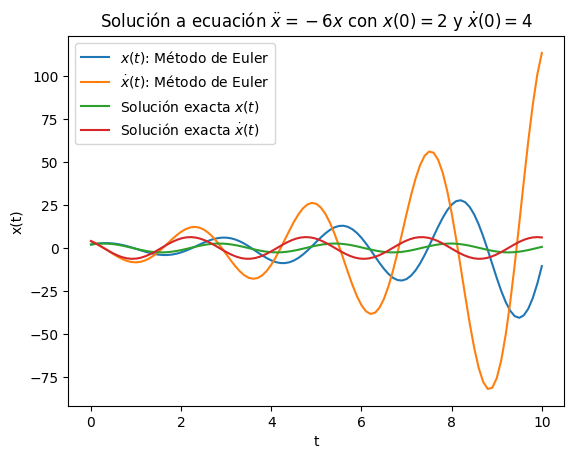

In [41]:
#Graficamos x(t) y v(t)
plot(listatE,listaxE1,label=L"$x(t)$: Método de Euler")
plot(listatE,listaxE2,label=L"$\dot{x}(t)$: Método de Euler")
plot(tsolosc,solucionx.(tsolosc),label=L"Solución exacta $x(t)$")
plot(tsolosc,solucionv.(tsolosc),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-6x$ con $x(0)=2$ y $\dot{x}(0)=4$")
xlabel("t")
ylabel("x(t)")
legend()
show()

Notamos que para $t<4$ la aproximación por método de Euler resulta decente, después de esto diverge y se desfasa.

Ahora aplicando método de Runge-Kutta de orden 4:

In [42]:
listatRK4=0:0.1:10 #Para comparar con el método de Euler elegimos el mismo paso de 0.1
arregloRK4=RungeKutta4_variante(f,listatRK4,[2,4])

101-element Array{Any,1}:
 [2, 4]               
 [2.3363, 2.6926]     
 [2.53313, 1.22446]   
 [2.57874, -0.316765] 
 [2.4704, -1.83908]   
 [2.21459, -3.2516]   
 [1.82658, -4.47001]  
 [1.32952, -5.42157]  
 [0.753102, -6.04947] 
 [0.131724, -6.31623] 
 [-0.497515, -6.20594]
 [-1.09705, -5.72517] 
 [-1.6311, -4.90262]  
 ⋮                    
 [-1.65275, -4.85798] 
 [-2.08435, -3.73124] 
 [-2.39153, -2.38175] 
 [-2.55593, -0.89009] 
 [-2.56776, 0.654704] 
 [-2.42629, 2.16041]  
 [-2.13999, 3.53714]  
 [-1.72593, 4.70271]  
 [-1.20885, 5.58754]  
 [-0.619596, 6.13881] 
 [0.00664086, 6.3236] 
 [0.632479, 6.1309]   

In [43]:
#Aplicando `map` a arregloRK4:
listaxRK4_1=map(x->x[1],arregloRK4) #Aquí tomamos el primer flotante de cada entrada y hacemos un arreglo que llamaremos listaxRK4_1
listaxRK4_2=map(x->x[2],arregloRK4) #Aquí tomamos el segundo flotante de cada entrada y hacemos un arreglo que llamaremos listaRK4_2

101-element Array{Real,1}:
  4       
  2.6926  
  1.22446 
 -0.316765
 -1.83908 
 -3.2516  
 -4.47001 
 -5.42157 
 -6.04947 
 -6.31623 
 -6.20594 
 -5.72517 
 -4.90262 
  ⋮       
 -4.85798 
 -3.73124 
 -2.38175 
 -0.89009 
  0.654704
  2.16041 
  3.53714 
  4.70271 
  5.58754 
  6.13881 
  6.3236  
  6.1309  

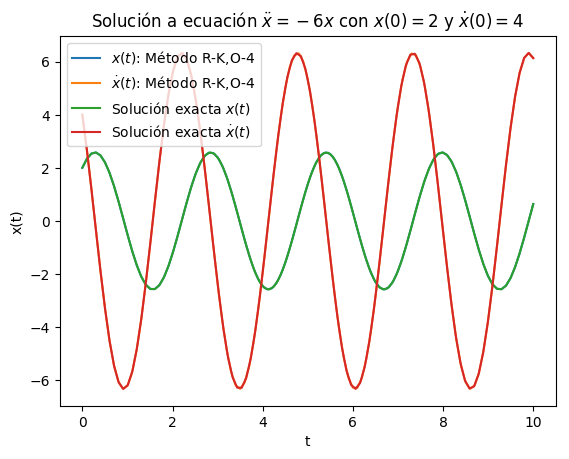

In [44]:
plot(listatRK4,listaxRK4_1,label=L"$x(t)$: Método R-K,O-4")
plot(listatRK4,listaxRK4_2,label=L"$\dot{x}(t)$: Método R-K,O-4")
plot(tsolosc,solucionx.(tsolosc),label=L"Solución exacta $x(t)$")
plot(tsolosc,solucionv.(tsolosc),label=L"Solución exacta $\dot{x}(t)$")
title(L"Solución a ecuación $\ddot{x}=-6x$ con $x(0)=2$ y $\dot{x}(0)=4$")
xlabel("t")
ylabel("x(t)")
legend()
show()

Con el método de Runge-Kutta la aproximación es casi indistinguible de las soluciones exactas.

Ahora, por lo que sabemos de Mecánica Clásica la energía mecánica del oscilador armónico simple es dada por la expresión:
$$E_{mec}=\frac{1}{2}m\dot{x}^{2}(t)+\frac{1}{2}kx^{2}(t),$$
Debido a nuestras condiciones iniciales:
$$m=1\:\mathrm{kg}$$
$$k=6\:\mathrm{N/m}$$
Debido a la Ley de Conservación de la Energía, la energía mecánica (total) del oscilador es una constante en el tiempo debido a que no hay fuerzas disipativas, por lo que para $t=0$ con las condiciones iniciales:
$$x(0)=2\:\mathrm{m}$$
$$\dot{x}(0)=4\:\mathrm{m/s}$$
Tenemos:
$$E(t)=E_{mec}=20\:\mathrm{J}$$

Con las aproximaciones de $x(t)$ y $\dot{x}(t)$ de Euler y Runge Kutta de orden 4 procedemos a graficar la energía en función del tiempo.

In [45]:
#Damos un arreglo con los valores de energía a distintas t con los arreglos de la aproximación de Euler
energia_Euler=0.5*((listaxE2.^2)+6*(listaxE1.^2))

101-element Array{Float64,1}:
   20.0   
   21.2   
   22.472 
   23.8203
   25.2495
   26.7645
   28.3704
   30.0726
   31.877 
   33.7896
   35.817 
   37.966 
   40.2439
    ⋮     
 3574.8   
 3789.29  
 4016.65  
 4257.65  
 4513.11  
 4783.89  
 5070.93  
 5375.18  
 5697.69  
 6039.55  
 6401.93  
 6786.04  

In [46]:
#Hacemos lo mismo pero con los arreglos obtenidos por Runge-Kutta
energia_RungeKutta4=0.5*((listaxRK4_2.^2)+6*(listaxRK4_1.^2))

101-element Array{Float64,1}:
 20.0   
 19.9999
 19.9999
 19.9998
 19.9998
 19.9997
 19.9996
 19.9996
 19.9995
 19.9995
 19.9994
 19.9993
 19.9993
  ⋮     
 19.9947
 19.9946
 19.9946
 19.9945
 19.9945
 19.9944
 19.9943
 19.9943
 19.9942
 19.9942
 19.9941
 19.994 

Para hacer las comparaciones pertinentes ahora obtendré el error relativo para cada método para posteriormente graficar la energía estimada con cada método contra el tiempo y el error relativo de cada método contra el tiempo.

In [47]:
#Definimos la lista que contendrá los errores de estimación usando Euler
error_relativo_energia_Euler=abs.((energia_Euler-20)/20)

101-element Array{Float64,1}:
   0.0     
   0.06    
   0.1236  
   0.191016
   0.262477
   0.338226
   0.418519
   0.50363 
   0.593848
   0.689479
   0.790848
   0.898299
   1.0122  
   ⋮       
 177.74    
 188.465   
 199.832   
 211.882   
 224.655   
 238.195   
 252.546   
 267.759   
 283.885   
 300.978   
 319.096   
 338.302   

In [48]:
#Definimos la lista que contendrá los errores de estimación usando Euler
error_relativo_energia_RungeKutta4=abs.((energia_RungeKutta4-20)/20)

101-element Array{Float64,1}:
 0.0        
 2.9775e-6  
 5.95499e-6 
 8.93247e-6 
 1.19099e-5 
 1.48874e-5 
 1.78649e-5 
 2.08423e-5 
 2.38198e-5 
 2.67972e-5 
 2.97746e-5 
 3.2752e-5  
 3.57294e-5 
 ⋮          
 0.000264963
 0.000267939
 0.000270916
 0.000273893
 0.00027687 
 0.000279846
 0.000282823
 0.0002858  
 0.000288776
 0.000291753
 0.000294729
 0.000297706

In [49]:
#Declaramos la función energía como la constante que resultó de la deducción inicial
energia(t)=20

energia (generic function with 1 method)

In [50]:
#Damos el linspace para graficar
tenergia=tsolosc

0.0:0.10101010101010101:10.0

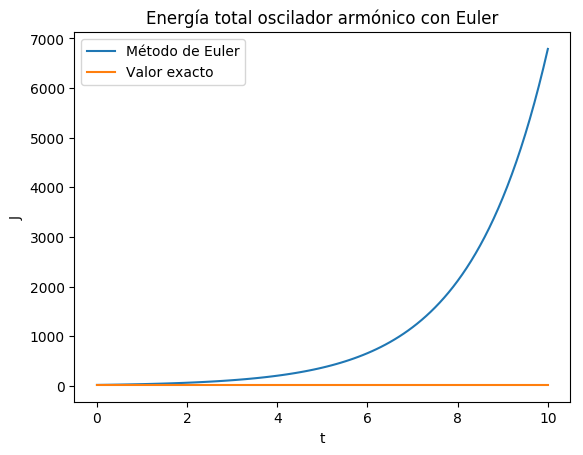

In [51]:
#Graficando la energía estimada con Euler y el valor exacto
plot(listatE,energia_Euler,label="Método de Euler")
plot(tenergia,energia.(tenergia),label="Valor exacto")
title("Energía total oscilador armónico con Euler")
xlabel("t")
ylabel("J")
legend()
show()

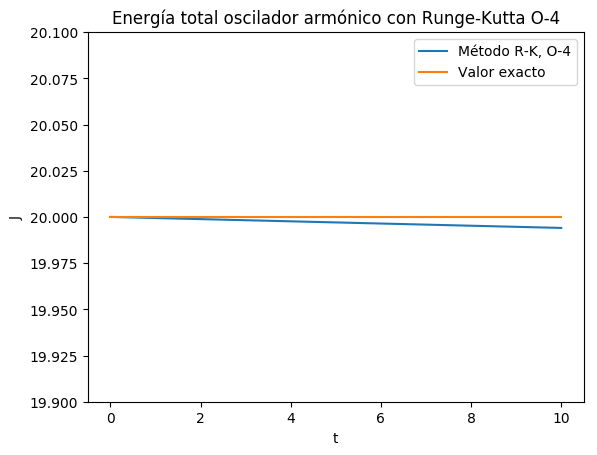

In [52]:
#Graficando la energía estimada con Runge-Kutta de orden 4 y el valor exacto
plot(listatRK4,energia_RungeKutta4,label="Método R-K, O-4")
plot(tenergia,energia.(tenergia),label="Valor exacto")
title("Energía total oscilador armónico con Runge-Kutta O-4")
xlabel("t")
ylabel("J")
ylim(19.9,20.1) #Grafica adecuadamente con este límite
legend()
show()

Es claro que para este problema resultó mejor el método de Runge-Kutta de orden 4 para aproximar, esto resultará lo notaremos graficando el error relativo.

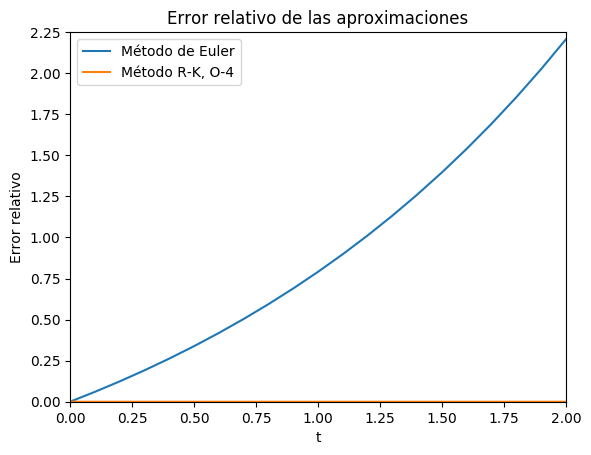

In [53]:
#Graficando los errores para Euler y Runge-Kutta de orden 4
#Debido a la divergencia de la energía de Euler impondré un límite en el eje x
plot(listatE,error_relativo_energia_Euler,label="Método de Euler")
plot(listatRK4,error_relativo_energia_RungeKutta4,label="Método R-K, O-4")
title("Error relativo de las aproximaciones")
xlabel("t")
ylabel("Error relativo")
xlim(0,2)
ylim(0,2.25)
legend()
show()

El método de Euler diverge casi instantáneamente mientras que Runge-Kutta de orden 4 mantiene el error practicamente en cero.

## Ejercicio 7

Ahora se gráfica la trayectoria $(x(t),v(t))=(x(t),\dot{x}(t))$ con los métodos de Euler y el método de Runge-Kutta de orden 4 usand $h=0.01$

In [54]:
#Damos el paso h con
listattray=0:0.01:10

0.0:0.01:10.0

In [55]:
#Aplicamos Euler
arregloEulertray=metodo_euler_variante(f,listattray,[2,4])
#Generamos las listas con los componentes
listaxET1=map(x->x[1],arregloEulertray)
listaxET2=map(x->x[2],arregloEulertray)

1001-element Array{Real,1}:
 4      
 3.88   
 3.7576 
 3.63287
 3.50589
 3.37673
 3.24546
 3.11217
 2.97693
 2.83982
 2.70093
 2.56033
 2.41812
 ⋮      
 8.50549
 8.51091
 8.51124
 8.50646
 8.49657
 8.48158
 8.46149
 8.43631
 8.40606
 8.37074
 8.33038
 8.285  

In [56]:
#Damos el linspace para graficar la solución exacta
ttray=linspace(0,10,100)

0.0:0.10101010101010101:10.0

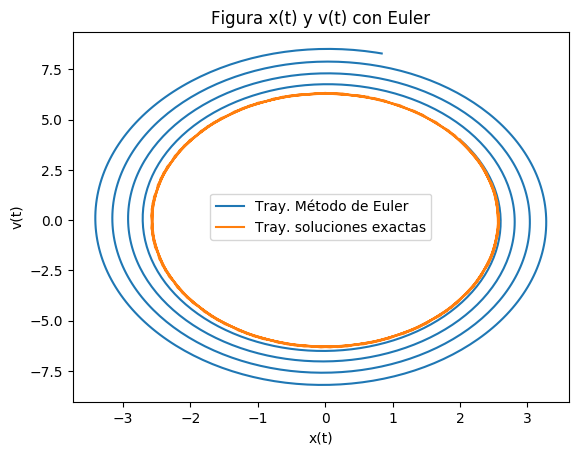

In [57]:
#Graficando (x(t),v(t))
plot(listaxET1,listaxET2,label="Tray. Método de Euler")
plot(solucionx.(ttray),solucionv.(ttray),label="Tray. soluciones exactas")
title("Figura x(t) y v(t) con Euler")
xlabel("x(t)")
ylabel("v(t)")
legend()
show()

In [58]:
#Aplicamos Runge-Kutta de orden 4
arregloRungeKutta4tray=RungeKutta4_variante(f,listattray,[2,4])
#Generamos las listas con los componentes
listaxRK4_T1=map(x->x[1],arregloRungeKutta4tray)
listaxRK4_T2=map(x->x[2],arregloRungeKutta4tray)

1001-element Array{Real,1}:
 4      
 3.87881
 3.7553 
 3.62953
 3.50158
 3.37154
 3.23947
 3.10545
 2.96958
 2.83192
 2.69256
 2.55159
 2.40909
 ⋮      
 6.32313
 6.32452
 6.32212
 6.31592
 6.30593
 6.29216
 6.27461
 6.2533 
 6.22823
 6.19943
 6.16691
 6.1307 

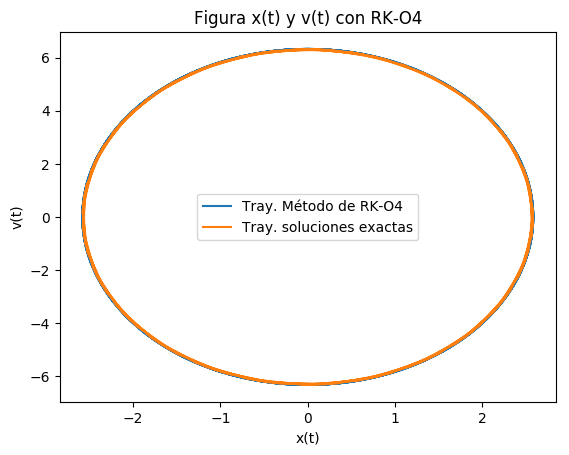

In [59]:
#Graficando (x(t),v(t))
plot(listaxRK4_T1,listaxRK4_T2,label="Tray. Método de RK-O4")
plot(solucionx.(ttray),solucionv.(ttray),label="Tray. soluciones exactas")
title("Figura x(t) y v(t) con RK-O4")
xlabel("x(t)")
ylabel("v(t)")
legend()
show()

## Ejercicio 8

Graficaremos varias condiciones iniciales del espacio de fase para el oscilador armónico con $k=6$ usando solo Runge-Kutta de orden 4, el paso será de $h=0.01$ y $t\in(0,10)$. Tomaremos además $m=1$

In [60]:
#Obtenemos las listas
listat_RK4=0:0.01:10
#x(0)=1, v(0)=1
listax_RKa1=map(x->x[1],RungeKutta4_variante(f,listat_RK4,[1,1])) 
listav_RKa1=map(x->x[2],RungeKutta4_variante(f,listat_RK4,[1,1]))
#x(0)=2, v(0)=6
listax_RKa2=map(x->x[1],RungeKutta4_variante(f,listat_RK4,[2,6]))  
listav_RKa2=map(x->x[2],RungeKutta4_variante(f,listat_RK4,[2,6]))
#x(0)=5, v(0)=7
listax_RKa3=map(x->x[1],RungeKutta4_variante(f,listat_RK4,[5,7]))  
listav_RKa3=map(x->x[2],RungeKutta4_variante(f,listat_RK4,[5,7]))
#x(0)=10, v(0)=9
listax_RKa4=map(x->x[1],RungeKutta4_variante(f,listat_RK4,[10,9]))  
listav_RKa4=map(x->x[2],RungeKutta4_variante(f,listat_RK4,[10,9]))

1001-element Array{Real,1}:
  9      
  8.39736
  7.78968
  7.17733
  6.56067
  5.94008
  5.31592
  4.68857
  4.05841
  3.42582
  2.79117
  2.15484
  1.51722
  ⋮      
 24.8409 
 24.6376 
 24.4196 
 24.1869 
 23.9396 
 23.6781 
 23.4023 
 23.1124 
 22.8087 
 22.4913 
 22.1605 
 21.8163 

Para verificar cada uno de ellos recordamos que la solución exacta es:
$$x(t)=x(0)\cos\left(\sqrt{k}t\right)+\frac{\dot{x}(0)}{\sqrt{k}}\:\sin\left(\sqrt{k}t\right)$$
Y para v(t):
$$v(t)=\dot{x}(t)=-\sqrt{k}x(0)\sin\left(\sqrt{k}t\right)+\dot{x}(0)\cos\left(\sqrt{k}t\right)$$

In [61]:
#Soluciones para nuestras condiciones
#x(0)=1, v(0)=1
solucionx_c1(t)=cos(sqrt(6)*t)+(1/sqrt(6))*sin(sqrt(6)*t)
solucionv_c1(t)=-sqrt(6)*sin(sqrt(6)*t)+cos(sqrt(6)*t)
#x(0)=2, v(0)=6
solucionx_c2(t)=2*cos(sqrt(6)*t)+(sqrt(6))*sin(sqrt(6)*t)
solucionv_c2(t)=-2*sqrt(6)*sin(sqrt(6)*t)+6*cos(sqrt(6)*t)
#x(0)=5, v(0)=7
solucionx_c3(t)=5*cos(sqrt(6)*t)+(7/sqrt(6))*sin(sqrt(6)*t)
solucionv_c3(t)=-5*sqrt(6)*sin(sqrt(6)*t)+7*cos(sqrt(6)*t)
#x(0)=10, v(0)=9
solucionx_c4(t)=10*cos(sqrt(6)*t)+(9/sqrt(6))*sin(sqrt(6)*t)
solucionv_c4(t)=-10*sqrt(6)*sin(sqrt(6)*t)+9*cos(sqrt(6)*t)

solucionv_c4 (generic function with 1 method)

In [62]:
tvarios=linspace(0,10,1000)

0.0:0.01001001001001001:10.0

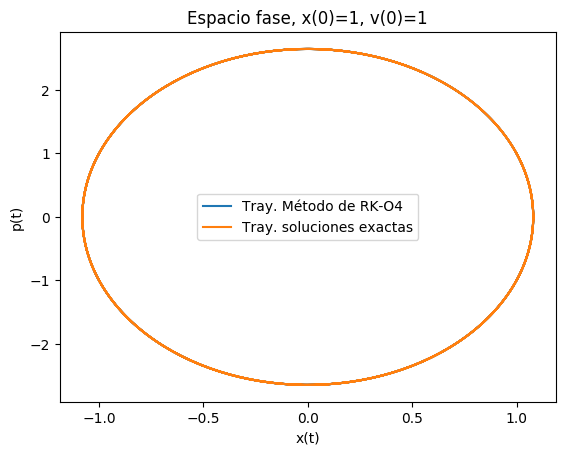

In [63]:
#Graficando (x(t),v(t))
plot(listax_RKa1,listav_RKa1,label="Tray. Método de RK-O4")
plot(solucionx_c1.(tvarios),solucionv_c1.(tvarios),label="Tray. soluciones exactas")
title("Espacio fase, x(0)=1, v(0)=1")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

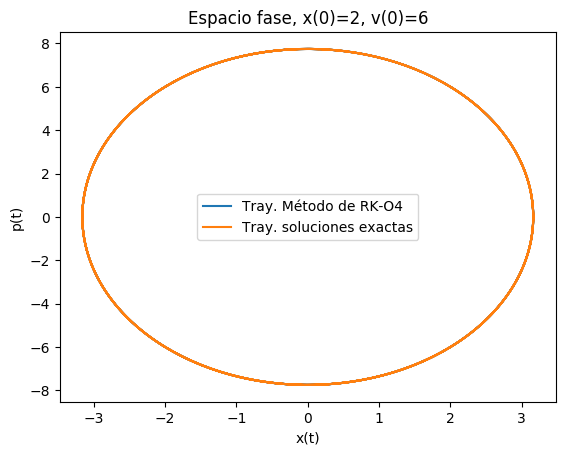

In [64]:
#Graficando (x(t),v(t))
plot(listax_RKa2,listav_RKa2,label="Tray. Método de RK-O4")
plot(solucionx_c2.(tvarios),solucionv_c2.(tvarios),label="Tray. soluciones exactas")
title("Espacio fase, x(0)=2, v(0)=6")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

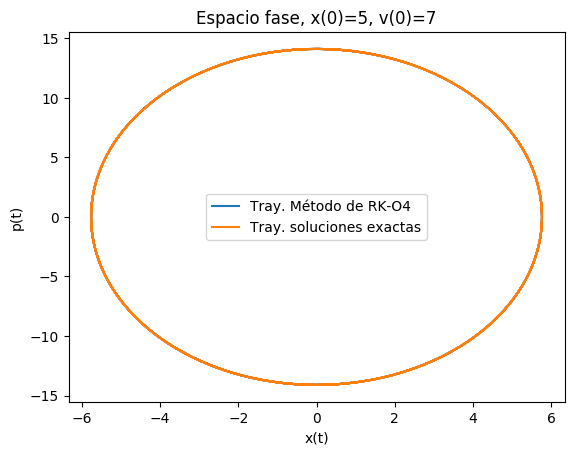

In [65]:
#Graficando (x(t),v(t))
plot(listax_RKa3,listav_RKa3,label="Tray. Método de RK-O4")
plot(solucionx_c3.(tvarios),solucionv_c3.(tvarios),label="Tray. soluciones exactas")
title("Espacio fase, x(0)=5, v(0)=7")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

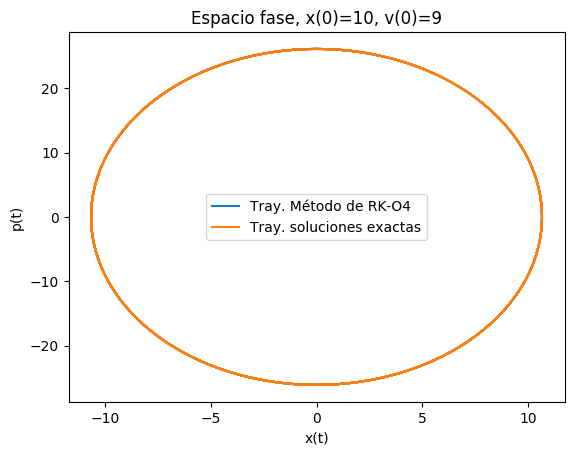

In [66]:
#Graficando (x(t),v(t))
plot(listax_RKa4,listav_RKa4,label="Tray. Método de RK-O4")
plot(solucionx_c4.(tvarios),solucionv_c4.(tvarios),label="Tray. soluciones exactas")
title("Espacio fase, x(0)=10, v(0)=9")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

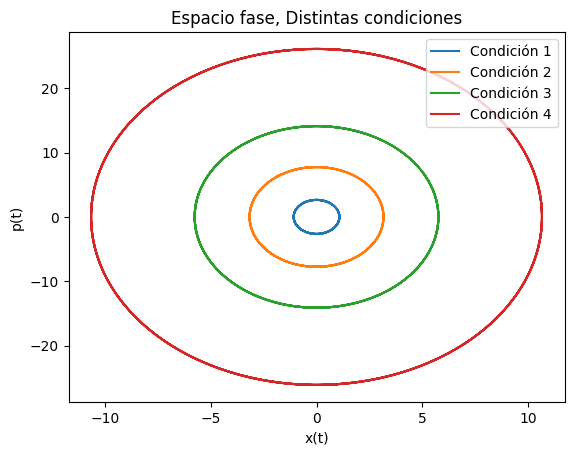

In [67]:
#Graficando las cuatro en una sola después de comprobar que si son buenas aproximaciones
plot(listax_RKa1,listav_RKa1,label="Condición 1")
plot(listax_RKa2,listav_RKa2,label="Condición 2")
plot(listax_RKa3,listav_RKa3,label="Condición 3")
plot(listax_RKa4,listav_RKa4,label="Condición 4")
title("Espacio fase, Distintas condiciones")
xlabel("x(t)")
ylabel("p(t)")
legend()
show()

FIN